# Project EDA

Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

Requirements:

Create an exploratory data analysis notebook.
2. Perform statistical analysis, along with any visualizations.
3. Determine how to handle sampling or missing values.
4. Clearly identify shortcomings, assumptions, and next steps.

Submission:

Due Tuesday May 8.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import matplotlib.pylab as plt
import datetime as dt
import sklearn.metrics
import seaborn as sns

from sklearn.feature_selection import RFE
from datetime import datetime
from pandas import Series, DataFrame
from sklearn.metrics import classification_report
from sklearn import tree, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
loc = pd.read_csv('data/loc_sample.csv')#, 
                  #parse_dates=['as_of_date', 'firstdate', 'first_draw_date'],date_parser=lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [4]:
loc.head()

,loan_id,as_of_date,total_outstanding_principal,last_draw_date,dpd_calendar,last_cleared_payment_date,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,...,age_months,lifetime_utilization_pct,lifetime_draw_count,closedate,wa_credit_score__c,dpd10slope,firstdate,lastdlqdate,firstdlq,write_off_flag
0,A0012642041943,2015-10-14,14731.61,2015-09-14,0.0,2015-10-14,25000.0,NaN,NaN,0.0,...,7,0.549411,7,2015-03-30,763.0,0.0,2015-03-30,NaN,NaN,0
1,A0012642041943,2015-10-21,14074.57,2015-09-14,0.0,2015-10-21,25000.0,NaN,NaN,0.0,...,7,0.550638,7,2015-03-30,763.0,0.0,2015-03-30,NaN,NaN,0
2,A0012642041943,2015-10-28,13412.98,2015-09-14,0.0,2015-10-28,25000.0,NaN,NaN,0.0,...,7,0.550919,7,2015-03-30,763.0,0.0,2015-03-30,NaN,NaN,0
3,A0012642041943,2015-11-04,12746.81,2015-09-14,0.0,2015-11-04,25000.0,NaN,NaN,0.0,...,8,0.550340,7,2015-03-30,763.0,0.0,2015-03-30,NaN,NaN,0
4,A0012642041943,2015-11-18,11400.60,2015-09-14,0.0,2015-11-18,25000.0,NaN,NaN,0.0,...,8,0.547000,7,2015-03-30,763.0,0.0,2015-03-30,NaN,NaN,0


In [5]:
#loc.hist(bins=100, figsize=(10,10))  

In [6]:
loc.dtypes

loan_id                         object
as_of_date                      object
total_outstanding_principal    float64
last_draw_date                  object
dpd_calendar                   float64
last_cleared_payment_date       object
credit_limit                   float64
lsp_wo_new_principal           float64
lsp_wo_new_interest            float64
past_due_principal             float64
past_due_interest              float64
write_off_date                  object
current_utilization_pct        float64
lifetime_i_paid                float64
lifetime_p_paid                float64
lifetime_missed_payments         int64
lifetime_partial_payments        int64
lifetime_ot_payments             int64
first_draw_date                 object
age_months                       int64
lifetime_utilization_pct       float64
lifetime_draw_count              int64
closedate                       object
wa_credit_score__c             float64
dpd10slope                     float64
firstdate                

## Dataset

The raw dataset includes all weekly performance information for all LOCs(18,833 unique loan ids) that has originated between 2013-09-18 and 2018-05-02: 1,236,623 observations in total.

## Data Dictionary

### Target Variable
1. write_off_flag -  Loan default status.  The status is a binary variable, where 1 means "Yes" and 0 means "No".

### Input Variables
1. loan_id - The unique identifier for each LOC account.    
2. as_of_date - The effective date that reflects what each metric on that table was as of the specific date in    
   question.
3. total_outstanding_principal - The Outstanding Prinicipal owed on the LOC account.
4. last_draw_date - The date of the most recent draw made that is still in a cleared state.
5. dpd_calendar - The count of days past due in "calendar days".
6. last_cleared_payment_date - The date of the most recent regular and one-time payment made that is still in a 
   cleared state.
7. credit_limit - The credit limit of the LOC account on the as_of_date.
8. lsp_wo_new_principal - The sum of the amounts of principal of both write off and additional write off transactions.
9. lsp_wo_new_interest - The sum of the amounts of interest of both write off and additional write off transactions.
10. past_due_principal - The Prinicipal that is past due on the LOC account (this is a subset of the Outstanding    
    Principal).
11. past_due_interest - The Interest that is past due on the LOC account (this is a subset of the Outstanding 
    Interest).
12. write_off_date - he date the LOC account was written off.
13. current_utilization_pct - The percentage that is being used by the merchant as of the specific day in question 
    (i.e. prinicipal owed over credit limit).
14. lifetime_i_paid - The total amount of regular and ot interest the merchant has paid since LSP has boarded the 
    loan.
15. lifetime_p_paid - The total amount of regular and ot principal the merchant has paid since LSP has boarded the 
    loan.
16. lifetime_missed_payments - The count of missed and error regular payments since LSP has boarded the loan.
17. lifetime_partial_payments - The count of "partial regular payments" made by the merchant since LSP has boarded the 
    loan.
18. lifetime_ot_payments - The count of "one-time" payments made since LSP has boarded the loan.
19. first_draw_date - The date of the first draw made by the merchant since LSP has boarded the loan.
20. age_months - The age in months since LSP boarded this account.
21. lifetime_utilization_pct - The percentage that is being used by the merchant using the daily average balance as 
    the numerator.
22. lifetime_draw_count - The count of draws requested by the merchant since LSP has boarded the loan.
23. closedate - The date the LOC was boarded into LSP, whether they drew on that day or not.
24. wa_credit_score__c - merchant credit score.


In [7]:
len(loc)

199997

In [8]:
len(loc['loan_id'].unique())

4698

In [9]:
loc.isnull().sum()

loan_id                             0
as_of_date                          0
total_outstanding_principal         0
last_draw_date                  20782
dpd_calendar                    12141
last_cleared_payment_date       21218
credit_limit                        0
lsp_wo_new_principal           186922
lsp_wo_new_interest            186922
past_due_principal                  0
past_due_interest                   0
write_off_date                 186922
current_utilization_pct             0
lifetime_i_paid                 21015
lifetime_p_paid                     0
lifetime_missed_payments            0
lifetime_partial_payments           0
lifetime_ot_payments                0
first_draw_date                 20782
age_months                          0
lifetime_utilization_pct            0
lifetime_draw_count                 0
closedate                           0
wa_credit_score__c                136
dpd10slope                       1188
firstdate                           0
lastdlqdate 

In [10]:
target = ['write_off_flag']
inputs = [column for column in loc.columns.values.tolist() if (column not in target)] 

In [11]:
y = loc[target]
X = loc[inputs]

There are 22,098 unique loans.

In [12]:
loc['as_of_date'].min()

'2015-09-30'

In [13]:
loc['as_of_date'].max()

'2017-06-28'

In [14]:
loc['write_off_flag'].value_counts()

0    186922
1     13075
Name: write_off_flag, dtype: int64

The raw dataset includes weekly performance information on Wednesday for Company xx's line of credit originated between 2015-09-30 and 2017-06-28.  

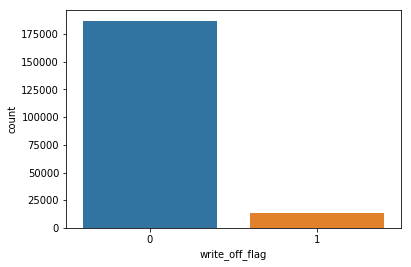

In [15]:
sns.countplot(x='write_off_flag', data=loc)
plt.show()
plt.savefig('count_plot')

in total, 1,132,487 did not default and the remaining 104,136 defaulted.

In [16]:
loc.groupby('write_off_flag').mean()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope
write_off_flag,,,,,,,,,,,,,,,,,,
0,7916.293980,2.678695,19817.854506,NaN,NaN,200.200568,23.004092,0.413915,2785.96195,24259.138736,1.233889,1.140513,1.561694,11.227239,0.408379,7.399439,687.166158,0.156116
1,786.121242,98.710921,15982.868069,12385.022517,1196.480523,503.363023,68.470633,0.051216,2288.18701,15415.099833,17.558164,1.501721,1.054761,16.560000,0.477447,8.000535,660.954723,-1.698910


#### In order to gain an understanding of the two groups, the mean of each of the independent variables were calculated.
#### Observations:
The average total_outstanding_principal for loans that defaulted is lower than total_outstanding_principal for loans 
that did not default.
The average credit_limit for loans that defaulted is lower than those that did not default.
The average current_utilization_pct is 20x lower for loan that defaulted compared to loans that did not default.
The average age of loan is is 7months older for those who defailted than those who did not.

In [17]:
loc.corr()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
total_outstanding_principal,1.000000,0.061325,0.426601,0.085262,0.048829,0.160569,0.155212,0.755263,0.492100,0.398124,-0.150721,-0.007138,0.021887,-0.075223,0.505365,0.397511,0.003567,0.129614,-0.192199
dpd_calendar,0.061325,1.000000,-0.051645,0.068497,0.165654,0.763712,0.671222,0.128006,0.035677,-0.000680,0.582893,0.060123,0.010265,0.053966,0.158998,0.063491,-0.069581,0.678750,0.402266
credit_limit,0.426601,-0.051645,1.000000,0.804229,0.533543,0.017012,0.006202,-0.042055,0.312210,0.352373,-0.103112,-0.063445,0.008325,-0.064224,-0.120955,0.028116,0.261409,-0.000084,-0.079548
lsp_wo_new_principal,0.085262,0.068497,0.804229,1.000000,0.775133,0.072793,0.087303,0.025103,0.366436,0.370718,-0.093120,-0.062124,-0.041080,-0.031957,0.194104,0.297710,0.213603,-0.007541,NaN
lsp_wo_new_interest,0.048829,0.165654,0.533543,0.775133,1.000000,0.040975,0.101529,-0.007144,0.274140,0.292511,0.127384,-0.062246,-0.074198,-0.010750,0.245980,0.282636,0.187887,-0.063568,NaN
past_due_principal,0.160569,0.763712,0.017012,0.072793,0.040975,1.000000,0.866545,0.177304,0.104655,0.042495,0.309575,0.037309,0.003750,0.054128,0.180591,0.103714,-0.048639,0.470593,0.056623
past_due_interest,0.155212,0.671222,0.006202,0.087303,0.101529,0.866545,1.000000,0.183949,0.071279,0.030919,0.274549,0.007417,0.000135,0.045946,0.164232,0.098326,-0.040537,0.443048,0.061721
current_utilization_pct,0.755263,0.128006,-0.042055,0.025103,-0.007144,0.177304,0.183949,1.000000,0.345750,0.200138,-0.164586,0.033974,0.018771,-0.091645,0.718337,0.450128,-0.146270,0.195160,-0.242872
lifetime_i_paid,0.492100,0.035677,0.312210,0.366436,0.274140,0.104655,0.071279,0.345750,1.000000,0.660132,-0.017619,0.098066,0.095263,0.486971,0.514913,0.707653,-0.014017,0.019582,-0.047899
lifetime_p_paid,0.398124,-0.000680,0.352373,0.370718,0.292511,0.042495,0.030919,0.200138,0.660132,1.000000,0.004336,0.144026,0.356721,0.372427,0.295452,0.557368,0.060510,0.011764,-0.070436


### The following variables are highly correlated: 
- write_off_flag and lifetime_missed_payments 
- write_off_flag and dpd_calendar
- write_off_flag and age_months
- total_outstanding_principal and current_utilization_pct 
- total_outstanding_principal and credt_limit 
- wa_credit_score__c and credt_limit 

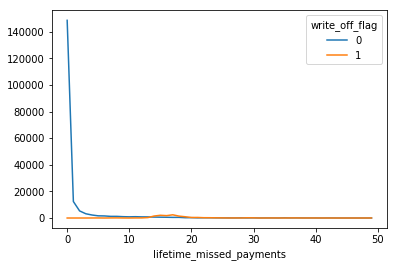

In [18]:
pd.crosstab(loc['lifetime_missed_payments'], loc['write_off_flag']).plot(kind='line')
plt.show()

#loc['lifetime_missed_payments'].hist()

In [19]:
loc.groupby('lifetime_missed_payments').mean().head()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
lifetime_missed_payments,,,,,,,,,,,,,,,,,,
0,7686.884665,0.038758,20385.132314,NaN,NaN,1.712795,0.001062,0.390732,2556.891675,21448.925517,0.412444,1.283254,10.614107,0.375875,6.487738,690.351825,0.000572,0.000000
1,9849.503870,0.275305,18153.647306,NaN,NaN,45.400684,4.648926,0.549690,3901.869681,34099.607346,4.692301,1.814686,13.008401,0.577055,11.837386,675.557243,-0.001998,0.000000
2,9962.930345,3.189058,18001.124227,NaN,NaN,138.113969,13.019753,0.548217,4050.349933,34344.838595,3.314784,2.195241,13.109050,0.583773,12.119730,672.508838,0.100859,0.000000
3,8479.334903,3.459900,17021.929825,NaN,NaN,334.926560,29.338249,0.480193,3754.507594,35363.096795,3.374060,2.579887,14.062030,0.535305,11.347118,673.284774,0.164030,0.000000
4,7182.466611,5.045636,16230.600614,8866.956667,245.546667,476.653249,51.802367,0.459913,3313.440811,40484.334625,4.729066,3.627795,13.949145,0.523565,10.974573,671.694871,0.274175,0.010522


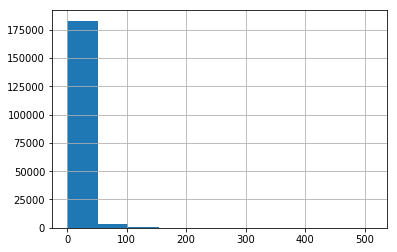

In [20]:
loc['dpd_calendar'].hist()

In [21]:
loc.groupby('dpd_calendar').mean().head()

,total_outstanding_principal,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
dpd_calendar,,,,,,,,,,,,,,,,,,
0.0,7705.564018,20009.991094,NaN,NaN,0.000000,0.000000,0.397504,2750.084205,24206.140596,0.762840,1.009312,1.552650,11.230943,0.393208,7.208563,688.438749,-0.014600,0.0
1.0,10969.084266,17141.960237,NaN,NaN,306.493303,37.876606,0.648996,2944.539159,24384.861420,2.930589,5.449250,1.425183,9.517265,0.596834,9.326822,671.045216,0.008132,0.0
2.0,9207.861000,14800.000000,NaN,NaN,1391.027000,0.000000,0.598980,3028.749000,17891.345000,4.800000,0.300000,1.500000,9.000000,0.675544,9.000000,669.100000,1.618182,0.0
3.0,12617.530000,20000.000000,NaN,NaN,5024.920000,0.000000,0.630876,3022.370000,13382.470000,13.000000,0.000000,4.000000,6.000000,0.834887,3.000000,643.000000,1.300000,0.0
4.0,10682.773333,15333.333333,NaN,NaN,2753.456667,260.370000,0.679436,1726.850000,9415.560000,6.333333,7.333333,0.000000,5.333333,0.788748,4.333333,671.000000,2.081818,0.0


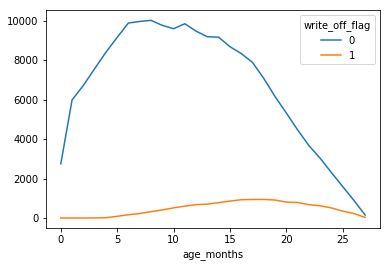

In [22]:
pd.crosstab(loc['age_months'], loc['write_off_flag']).plot(kind='line')
plt.show()

In [23]:
loc.groupby('age_months').mean().head()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
age_months,,,,,,,,,,,,,,,,,,
0,5319.319468,0.032058,21732.969035,NaN,NaN,4.309148,0.799129,0.275571,113.749037,665.541005,0.011293,0.005100,0.059745,0.218277,0.734062,689.026268,0.021539,0.000000
1,7314.551584,0.195183,21518.815855,NaN,NaN,14.305283,2.300361,0.380433,255.655510,2062.127060,0.060545,0.023248,0.167921,0.315685,1.344874,688.605157,0.031469,0.000000
2,8528.298746,0.632504,21186.056905,NaN,NaN,37.323508,5.562449,0.436432,507.104191,4223.450021,0.165053,0.074631,0.318338,0.370974,2.061224,687.670945,0.046401,0.000000
3,8746.322487,1.296732,20667.812748,13236.886667,1153.753333,91.859134,13.039558,0.449028,769.015612,6569.731981,0.337741,0.128934,0.453980,0.404747,2.654985,688.013369,0.103941,0.000397
4,8610.606249,2.136304,20092.055186,13739.078667,1120.500000,141.852906,19.096172,0.451538,1018.417927,8766.345563,0.535680,0.245837,0.610847,0.422495,3.292578,686.765420,0.154387,0.001784


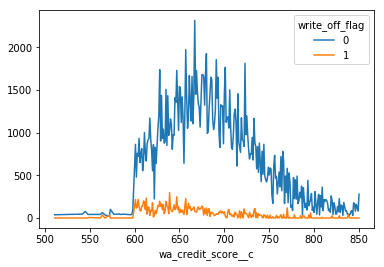

In [24]:
pd.crosstab(loc['wa_credit_score__c'], loc['write_off_flag']).plot(kind='line')
plt.show()

In [25]:
loc.groupby('wa_credit_score__c').mean().head()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,dpd10slope,write_off_flag
wa_credit_score__c,,,,,,,,,,,,,,,,,,
511.0,5165.747632,0.000000,6000.000000,NaN,NaN,0.000000,0.000000,0.860958,1283.547895,7315.831316,0.000000,0.0,0.000000,8.026316,0.862569,7.526316,0.000000,0.000
542.0,15653.101522,0.000000,20000.000000,NaN,NaN,0.000000,0.000000,0.782655,4549.052222,26928.420217,0.000000,0.0,0.000000,9.086957,0.704611,8.565217,0.000000,0.000
545.0,12380.709221,0.000000,15324.675325,NaN,NaN,0.000000,0.000000,0.825015,3274.611429,18792.485584,0.025974,0.0,0.000000,8.649351,0.792721,11.987013,0.000718,0.000
548.0,15187.430930,0.000000,20000.000000,NaN,NaN,0.000000,0.000000,0.759372,4035.100000,25298.615581,0.232558,0.0,0.232558,9.023256,0.713582,12.930233,-0.002748,0.000
549.0,19604.339167,7.309524,24062.500000,23988.39,2491.05,862.879792,169.529792,0.818035,7725.381667,44484.695417,2.895833,0.0,0.000000,14.083333,0.785019,17.041667,-0.146780,0.125


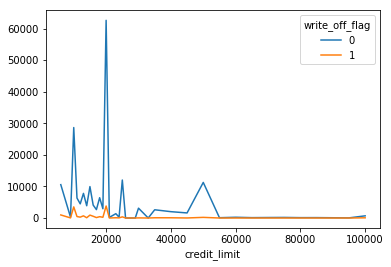

In [27]:
pd.crosstab(loc['credit_limit'], loc['write_off_flag']).plot(kind='line')
plt.show()

In [162]:
loc.groupby('credit_limit').mean().head() 

,loan_id,total_outstanding_principal,dpd_calendar,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
credit_limit,,,,,,,,,,,,,,,,,,,
5000.0,5.506242e+13,3707.942857,0.071429,NaN,NaN,12.752143,2.837857,0.741589,298.122857,1292.057143,0.642857,0.000000,0.000000,1.928571,0.711230,1.000000,669.000000,1.233766e-02,0.000000
6000.0,6.847632e+14,2375.488349,4.221854,4691.994730,483.503955,106.094242,13.307796,0.395915,932.712746,6989.138886,3.145396,0.420042,1.364636,11.172400,0.463608,4.792531,656.601134,3.326468e-02,0.125995
7000.0,1.135419e+15,2151.900280,2.088172,6249.400000,543.780000,71.345340,8.802920,0.307414,504.893995,5794.725720,1.642000,0.416000,1.120000,8.492000,0.328990,3.374000,704.016000,5.482583e-17,0.070000
8000.0,9.579762e+14,3253.884782,7.590406,NaN,NaN,0.894649,0.169786,0.406736,1067.778208,9186.644827,1.307749,0.350554,1.386716,11.435424,0.442389,5.070849,679.625109,-3.459250e-05,0.000000
9000.0,6.766368e+14,4956.429126,3.524914,7841.122367,703.191014,150.200147,14.773234,0.550714,2177.035271,17557.695294,1.760447,1.301942,3.646557,17.149205,0.487478,11.140671,655.155680,8.898405e-02,0.060918


#### Data Cleaning and Missing Value Imputation

Due to historical data issue, many subjective adjustments will be applied in the data cleaning step.
We will adjust interest balance, past due principal/interest and calendar days past due to 0 for loans with less than 700 principal balance. Calendar days past due was capped at as of date - last draw date, because a loan should be current at least as of its last draw date given current policy. Last cleared payment date will be imputed with the first Wednesday of the cycle when it is missing.

Other features for inclusion in the model that has missing values, should be analyzed for the reason why values are missing first and imputed with either a reasonable number based on the variable’s definition (like last cleared payment date above) or with the mean value.

#### The framework relies on the following assumptions:
• Data Gathering Processes
- Input data used by the models is generated in the same way it was in the model build sample
- Input data used by the models is correct 

• Statistical Models
- Past relationships between features and outputs continue to hold
- Portfolio mix does not change substantially from the model build sample
- Customer draw behavior does not change substantially from the model build sample – No important variables are excluded, and no unimportant variables are included

• Computations
- Expected loss is a function of probability of default and exposure at default

#### Next Steps
- Let's go!